## Domača naloga 2
### Marko Tacer, 23222087

Pri nalogi 2 smo generirali signal s pomočjo generatorja. Signal smo izmerili na priključku 2 in tudi na priključku 1, katerega meritve so brezpomenske. Definirali smo obliko signala, frekvenco in amplitudo. Določili smo tudi frekvenco vzorčenja in število meritev v posameznem zajemu. Kot vidimo spodaj so meritve kanala 2 smiselne, medtem ko so meritve na kanalu 1 sicer podobne, a netočne in neuporabne. 

In [115]:
import numpy as np
import matplotlib.pyplot as plt
import lvm_read
file = 'DN_signal-MT.lvm'
loaded_data = lvm_read.read(file)

In [150]:
data = loaded_data[0]['data'].T
N = data[0]
N1 = np.arange(0, 300)
t = data[1]
t1 = np.arange(0,0.5, 0.01)
kanal_1 = data[2]
kanal_2 = data[3]

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41., 42., 43., 44., 45., 46., 47., 48., 49.])

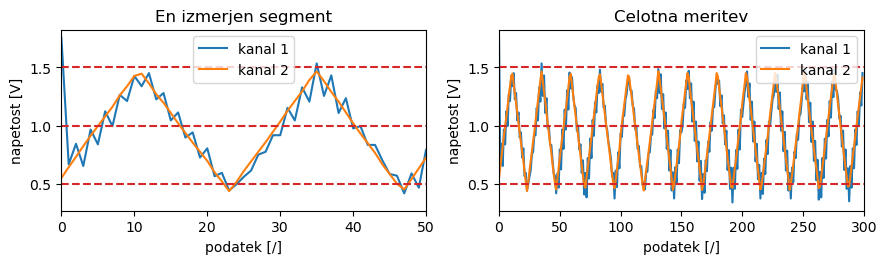

In [117]:
fig = plt.figure(figsize=(16, 8))

plt.subplot(3,3,1)
plt.gca().set_title('En izmerjen segment')
plt.plot(kanal_1, label='kanal 1')
plt.plot(kanal_2, label='kanal 2')
plt.xlabel('podatek [/]')
plt.ylabel('napetost [V]')
plt.xlim(0, 50)
plt.hlines(1, 0, 50, linestyles="dashed", color='C3')
plt.hlines(0.5, 0, 50, linestyles="dashed", color='C3')
plt.hlines(1.5, 0, 50, linestyles="dashed", color='C3')
plt.legend()

Tp = 300
plt.subplot(3,3,2)
plt.gca().set_title('Celotna meritev')
plt.plot(kanal_1, label='kanal 1')
plt.plot(kanal_2, label='kanal 2')
plt.xlabel('podatek [/]')
plt.ylabel('napetost [V]')
plt.xlim(0, Tp)
plt.hlines(1, 0, Tp, linestyles="dashed", color='C3')
plt.hlines(0.5, 0, Tp, linestyles="dashed", color='C3')
plt.hlines(1.5, 0, Tp, linestyles="dashed", color='C3')
plt.legend()

plt.show()

## Aproksimacija

Spodaj je prikazana aproksimacija na enem od zajetih segmentov. Aproksimacija je izvedena s pomočjo funkcij *InterpolatedUnivariateSpline* in *UnivariateSpline*. Prva naredi podobno, kot če pri *UnivariateSpline* definiramo faktor *"smooth"* : $s=0$. 

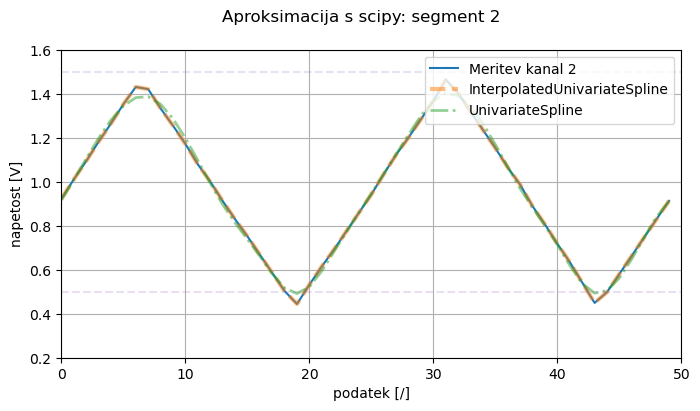

In [193]:
import scipy
i = 2
AA = 50*i 
BB = (i+1)*50         # obseg obravnavanega signala, v morem primeru i-ti segment

# https://jankoslavic.github.io/pynm/notebooks/Predavanje%2008%20-%20Aproksimacija.html#aproksimacija-s-poljubno-funkcijo
spline1 = scipy.interpolate.InterpolatedUnivariateSpline(N[AA:BB], kanal_2[AA:BB])
spline2 = scipy.interpolate.UnivariateSpline(N[AA:BB], kanal_2[AA:BB], s=0.02) #močan faktor "smooth": s 

fig = plt.figure(figsize=(8, 4))
plt.suptitle(f'Aproksimacija s scipy: segment {i}')
plt.plot(N[AA:BB], kanal_2[AA:BB], label='Meritev kanal 2')
plt.plot(N[AA:BB], spline1(N[AA:BB]), '--', alpha=0.5, lw=3, label='InterpolatedUnivariateSpline')
plt.plot(N[AA:BB], spline2(N[AA:BB]), '-.', alpha=0.5, lw=2, label='UnivariateSpline')
plt.xlabel('podatek [/]')
plt.ylabel('napetost [V]')
plt.hlines(0.5, 0, 50, linestyles="dashed", color='C4', alpha=0.2)
plt.hlines(1.5, 0, 50, linestyles="dashed", color='C4', alpha=0.2)
plt.xlim(0, 50)
plt.ylim(0.2, 1.6)
plt.legend(loc='upper right')
plt.grid(which='both')
plt.show()

## Numerično integriranje

https://stackoverflow.com/questions/40475628/fourier-transform-of-triangle-wave-in-python

In [119]:
import pandas as pd

df = pd.DataFrame(dict(
    x = N1,
    y1 = kanal_1,
    y2 = kanal_2
))

In [120]:
# import plotly.express as px
# df = kanal_1
fig = px.line(df, x='x', y='y1')
fig.show()

NameError: name 'px' is not defined

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# import lvm_read
# # file = 'DN_signal-MT.lvm'
# signal = lvm_read.read(file)

In [ ]:
# X_korak = signal[0]['Delta_X'][0]              #preberemo korak (časovni)
# p = np.array(signal[0]['data'].flatten())      #preberemo podatke v array
# x = np.arange(0, len(p) * X_korak, X_korak) 

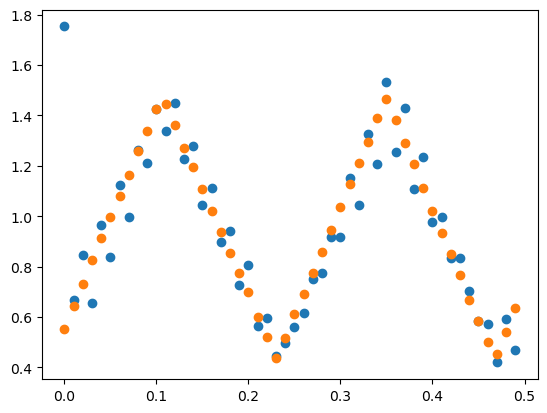

In [ ]:
# x = signal[0]['data'].flatten()[1:: 4]
# y1 = signal[0]['data'].flatten()[2:: 4]
# y2 = signal[0]['data'].flatten()[3:: 4]
# # plt.plot(x, y)
# plt.plot(x[:50], y1[:50], 'o')
# plt.plot(x[:50], y2[:50], 'o')